**Info**


*   **Computer vision training camp** for Micro Club's 1st wave of internal trainings.
* **Trainer:**  Sarra Laksaci -> SarraLKSC#7509 , saralaksaci@gmail.com





# **Problème**
>**Classification**

>  Coté CV c'est donner la possibilité à la machine de savoir ce qu'il y a dans l'image.Avoir assez de compréhension de l'image pour dire à quelle catégorie (classe) elle appartient.
>  ![](https://www.solutions-numeriques.com/wp-content/uploads/2018/01/computer-vision-tasks.png)
 > 1. Classification binaire: 
     Ici on aura le choix entre 2 classes seulement A ou B donc: 
$ p(y=A)=1-p(y=B) $ 
   > 2. Classification à n classes:
      Ici on aura le choix entre n classes (définies)



# **Solution**


##Pourquoi le Fully Connected ne fonctionne pas? 


* Taille des données à traiter  (coté math)

* Perte de l'information spatiale (coté intuition)


>><img src="https://drive.google.com/uc?id=1F4_FHCLOg_LiGon6AbY3wIlj4doeUXqE" width="60%"  >




In [ ]:
import numpy as np 
x=np.array([[0,0,1,1,0,0],[0,1,0,0,1,0],[0,1,0,0,1,0],[0,0,1,1,0,0]]) #imaginons que je représente à travers cette matrice un zero (noir sur blanc
print(x.shape)
print(x) # can you see it ? 

(4, 6)
[[0 0 1 1 0 0]
 [0 1 0 0 1 0]
 [0 1 0 0 1 0]
 [0 0 1 1 0 0]]


In [ ]:
x=np.reshape(x,[-1])
print(x.shape)
print(x) #and now can you see it ? 
#je père la notion de proximité entre les informations "voisines"

(24,)
[0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0]


##Les réseaux convolutifs
 #### **Architecture générale**

  ![](https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)
 1. Couches de convolutions :  Le rôle de cette couche est d’extraire les informations importantes à partir des images transmises en appliquant des filtres (par convolution). L’image obtenue est appelée feature map.
  * Convolution : opération matricielle réalisée entre la matrice du filtre et la matrice de l'image.
>>>  ![](https://www.cc.gatech.edu/~san37/img/dl/conv.gif) 

    * Padding : placer des 0 tout autour de la matrice -> stabilité du format + équité entre les valeurs utilisées. 
>>>  ![](https://i.stack.imgur.com/E5lFj.png)

    * Stride : nombre de déplacements que l’on effectue entre chaque calcul
de valeur de la nouvelle matrice.
 
   * Pooling : Permet de réduire la taille des données en gardant l’information essentielle et en supprimant les redondances, ce qui facilite l’application des calculs sans perte de l’efficacité.
    
    * Average Pooling 
>>>> ![](https://pylessons.com/static/images/CNN-tutorials/CNN-tutorial-introduction/Figure_14.jpg )
   
    * Max Pooling 
>>> ![]( https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif)
2. Couches Fully Connected : 
    *L'architecture que l'on a vu en détail lors de la dernière séance*

![](https://s3.amazonaws.com/hnrysprjcts/img/scene4.png)

![](https://miro.medium.com/max/1440/1*I75ghqLA1CbKeyqz3j-yGA.jpeg)


# **Implémentation**

In [ ]:
import tensorflow as tf 
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

### Classification binaire

In [ ]:
#load the data
dataset,info=tfds.load(name='horses_or_humans',split=['train','test'],with_info=True,shuffle_files=True)

In [ ]:
#learn about the data
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=3.0.0,
    description='A large set of images of horses and humans.',
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1283,
    splits={
        'test': 256,
        'train': 1027,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
    redistribution_info=,
)

In [ ]:
class_names=['horse','human']

In [ ]:
#split data
train_set=dataset[0]
test_set=dataset[1]
print(len(train_set))
print(len(test_set))

1027
256


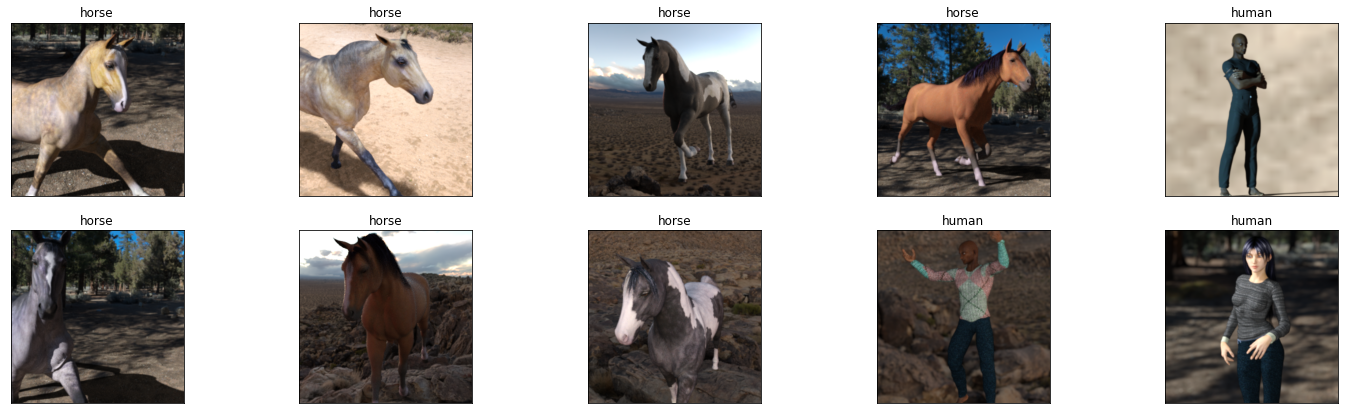

In [ ]:
#take a look at our data
figure=plt.figure(figsize=(25,7))
for i,example in enumerate(train_set.take(10)):
  x,y=example['image'],example['label']
  ax=figure.add_subplot(2,5,i+1,xticks=[],yticks=[])
  plt.imshow(x)
  plt.title(class_names[int(y)])


  

In [ ]:
#split some more ...
x_train=[]
y_train=[]
for sample in train_set:
  x_train.append(sample['image'])
  y_train.append(sample['label'])
print('nbr d\'images de training = {}'.format(len(x_train)))
print('nbr de label de training = {}'.format(len(y_train)))
nb_train=len(train_set)

nbr d'images de training = 1027
nbr de label de training = 1027


In [ ]:
x_test=[]
y_test=[]
for sample in test_set:
  x_test.append(sample['image'])
  y_test.append(sample['label'])
print('nbr d\'images de test = {}'.format(len(x_test)))
print('nbr de label de test = {}'.format(len(y_test)))
nb_test=len(x_test)

nbr d'images de test = 256
nbr de label de test = 256


In [ ]:
x_test=np.asarray(x_test,dtype=np.float64)
y_test=np.asarray(y_test,dtype=np.float64).reshape((-1,1))

In [ ]:
#fix it to match the network expectations
x_train=np.asarray(x_train,dtype=np.float64)
y_train=np.asarray(y_train,dtype=np.float64).reshape((-1,1))

In [ ]:
y_train.shape

(1027, 1)

In [ ]:
BATCH=32
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(32,(3,3),input_shape=(300,300,3)),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dropout(0.5),
                           tf.keras.layers.Dense(256,activation='relu'),
                           tf.keras.layers.Dense(2,activation='softmax')
])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
33/33 [==============================] - 427s 13s/step - loss: 296.1326 - accuracy: 0.5027 - val_loss: 0.6836 - val_accuracy: 0.4883
Epoch 2/10
33/33 [==============================] - 421s 13s/step - loss: 0.7527 - accuracy: 0.6703 - val_loss: 0.6930 - val_accuracy: 0.4883
Epoch 3/10
33/33 [==============================] - 423s 13s/step - loss: 0.6345 - accuracy: 0.6584 - val_loss: 0.7747 - val_accuracy: 0.7578
Epoch 4/10
33/33 [==============================] - 422s 13s/step - loss: 0.4799 - accuracy: 0.8223 - val_loss: 0.7733 - val_accuracy: 0.6367
Epoch 5/10
33/33 [==============================] - 422s 13s/step - loss: 0.4394 - accuracy: 0.7997 - val_loss: 2.0840 - val_accuracy: 0.8086
Epoch 6/10
33/33 [==============================] - 420s 13s/step - loss: 0.2559 - accuracy: 0.9001 - val_loss: 1.9342 - val_accuracy: 0.8438
Epoch 7/10
33/33 [==============================] - 419s 13s/step - loss: 0.1874 - accuracy: 0.9322 - val_loss: 1.5610 - val_accuracy: 0.8398
Epoc

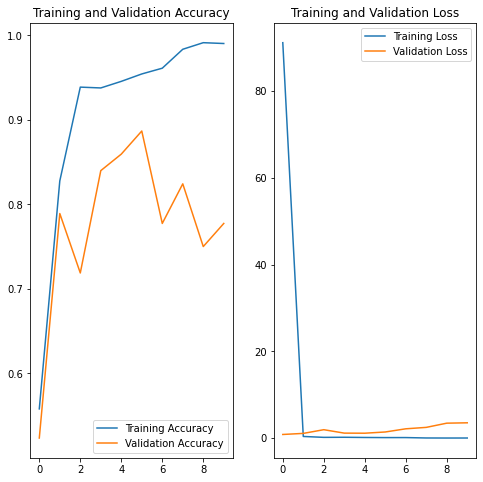

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

### Classification à n classes

1. Get the data

In [ ]:
#load the data
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [ ]:
#check numbers (image dimensions,dataset slipts ...)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


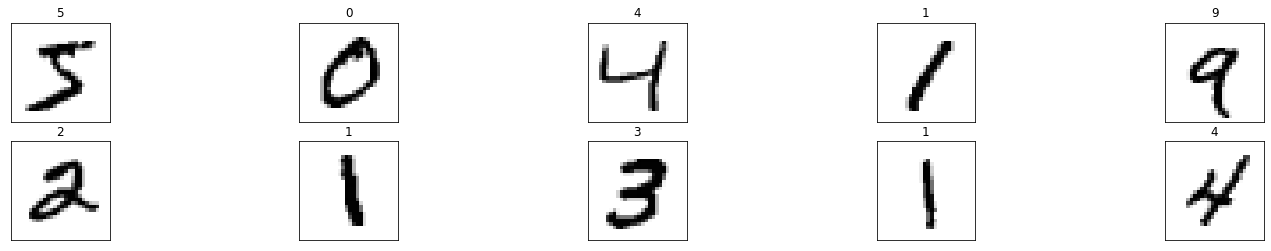

In [ ]:
#visualize the data
figure=plt.figure(figsize=(25,4))
for i in np.arange(10):
  ax=figure.add_subplot(2,5,i+1,xticks=[],yticks=[])
  plt.imshow(x_train[i],cmap=plt.get_cmap('binary'))
  ax.set_title(y_train[i])

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
#normalize the data 
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
x_train = x_train.reshape(list(x_train.shape) + [1])
#just to avoid tf exception -rolling eyes-

In [ ]:
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
x_test=x_test.reshape(list(x_test.shape)+[1])

2. build the model

In [ ]:
EPOCHS=10 
classifier=tf.keras.Sequential([
                                tf.keras.layers.Conv2D(16,(3,3),input_shape=(28,28,1)),
                                tf.keras.layers.MaxPool2D((3,3)),
                                tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                tf.keras.layers.MaxPool2D((3,3)),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(64,activation='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')
])

classifier.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='Adam',metrics=['accuracy'])


In [ ]:
history=classifier.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5677 - accuracy: 0.8302
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0806 - accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0581 - accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0412 - accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0368 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0309 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0272 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0240 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0222 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 19s 10m

3. evaluate results

In [ ]:
classifier.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0381 - accuracy: 0.9886


[0.03806246444582939, 0.9886000156402588]

In [ ]:
#check results on some test data
result=classifier.predict(x_test[:5])
print('predicted value= {}'.format(str(np.argmax(result[0]))))
print('desired value={}'.format(y_test[0]))

predicted value= 7
desired value=7


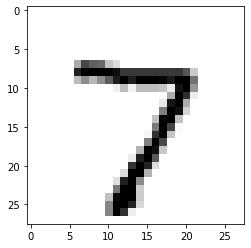

In [ ]:
img=np.reshape(x_test[0],(28,28))
plt.imshow(img,cmap=plt.get_cmap('binary'))